In [260]:
# Necessary import statements
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [278]:
# Necessary variables and helper functions:
LEARNING_RATE = 0.08
NUM_EPOCHS = 200

def get_loss(y, a):
  return -1 * np.sum(y * np.log(a))

def get_loss_numerically_stable(y, z):
   return -1 * np.sum(y * (z + (-z.max() - np.log(np.sum(np.exp(z-z.max()))))))

def get_gradients(x, z, a, y):
  da = (-y / a)
  matrix = np.matmul(a, np.ones((1, 3))) * (np.identity(3) - np.matmul(np.ones((3, 1)), a.T))
  dz = np.matmul(matrix, da)
  dW = dz * x.T
  db = dz.copy()
  return dz, dW, db

def gradient_descent(W, b, dW, db, learning_rate):
  W = W - learning_rate * dW
  b = b - learning_rate * db
  return W, b

In [262]:
# Necessary softmax functions:
def stable_softmax(z):
  # z is 3 x 1
  a = np.exp(z - max(z)) / np.sum(np.exp(z - max(z)))
  # a is 3 x 1
  return a

def forward_propagate(x, W, b):
  # W is 3 x 2
  # x is 2 x 1
  # b is 3 x 1
  z = np.matmul(W, x) + b
  a = stable_softmax(z)
  # z is 3 x 1
  # a is 3 x 1
  return z, a

In [263]:
def plot_loss(L_cache):
  plt.grid()
  plt.title('Loss', size=18)
  plt.xlabel('Number of iterations', size=15)
  plt.ylabel('Loss', size=15)
  plt.ylim([0, max(L_cache) * 1.1])
  plt.plot(L_cache)
  plt.show()

In [264]:
def multi_classifier(X, Y):
  # random initialization
  W_initial = np.random.rand(3, 2)
  W = W_initial.copy()
  b = np.zeros((3, 1))
  W_cache = []
  b_cache = []
  L_cache = []
  for i in range(NUM_EPOCHS):
    dW = np.zeros(W.shape)
    db = np.zeros(b.shape)
    L = 0
    for j in range(X.shape[0]):
      x_j = X[j,:].reshape(2,1)
      y_j = Y[j,:].reshape(3,1)
      # print(y_j)
      z_j, a_j = forward_propagate(x_j, W, b)
      loss_j = get_loss_numerically_stable(y_j, z_j)
      dZ_j, dW_j, db_j = get_gradients(x_j, z_j, a_j, y_j)
      dW += dW_j
      db += db_j
      L += loss_j
    # Find real datasize instead of 20:
    size = len(y)
    dW *= (1.0/size)
    db *= (1.0/size)
    L *= (1.0/size)
    W, b = gradient_descent(W, b, dW, db, LEARNING_RATE)
    W_cache.append(W)
    b_cache.append(b)
    L_cache.append(L)
  plot_loss(L_cache)


In [265]:
# Get the Iris Data Set:
def get_iris_dataset():
  iris = datasets.load_iris()
  X = np.array(iris.data[:,:2] )
  y = np.array(iris.target)[:]
  Y = np.eye(3)[y]
  return [X,Y]

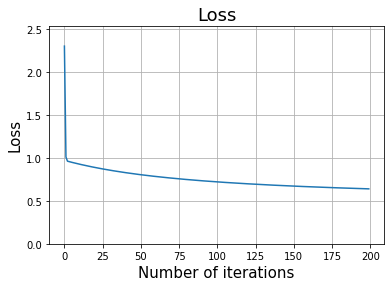

In [285]:
# Test code with iris dataset:
iris = get_iris_dataset()
X = iris[0]
y = iris[1]
multi_classifier(X, y)